Welcome to JupyROOT 6.28/04
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.001599_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.001601_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.001602_000.root
Reading file: rec.mu2e.CRV_wideband_cosmics.CRVWB-000-004-000.001600_000.root
!!! spill 1, 0003 DQM = 0x1
!!! spill 2, 0004 DQM = 0x1
!!! spill 3, 0005 DQM = 0x1
!!! spill 4, 0006 DQM = 0x1
!!! spill 5, 0007 DQM = 0x1
!!! spill 6, 0008 DQM = 0x1
!!! spill 7, 0009 DQM = 0x1
!!! spill 8, 0010 DQM = 0x1
!!! spill 9, 0011 DQM = 0x1


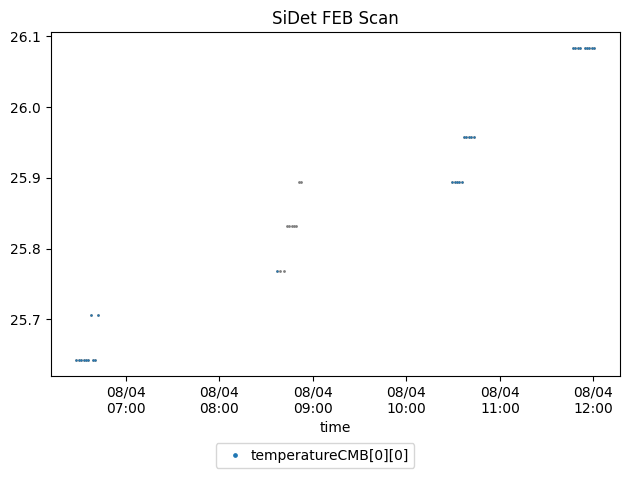

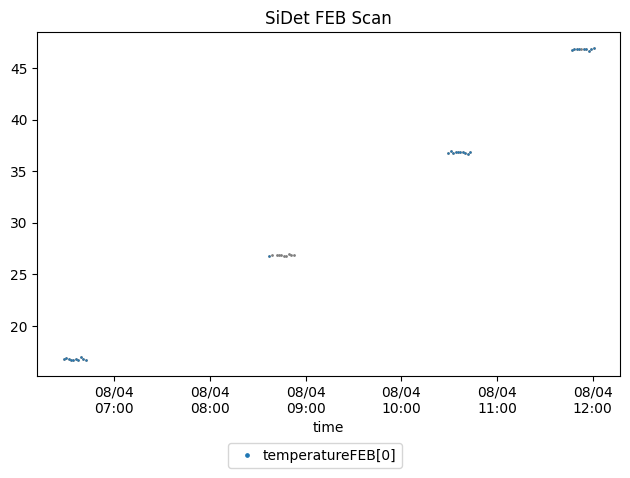

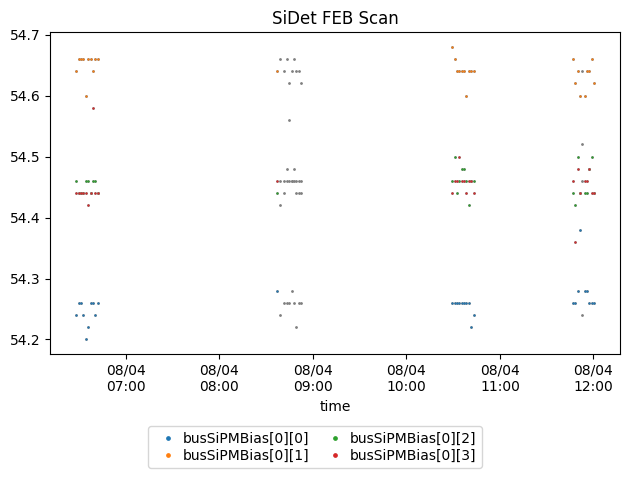

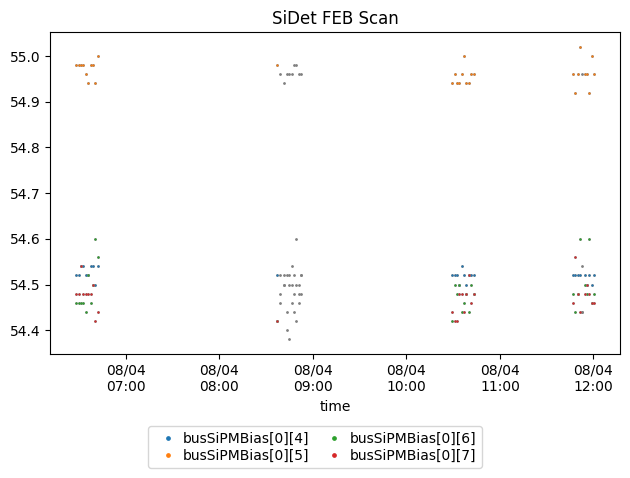

In [1]:
from __future__ import print_function
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import ROOT
%jsroot on
from ROOT import gROOT, gStyle, gDirectory, gPad

from array import array

import constants
import crv_event
import crv_spill
import utils
import geometry
import geometry_constants
import filepath

gROOT.Reset()
gROOT.SetBatch(1)
gROOT.ProcessLine( "gErrorIgnoreLevel = 1001;")
gStyle.SetOptStat(111110)
gStyle.SetOptFit(0)
gStyle.SetLineScalePS(0.3)

topdir = os.path.dirname(os.path.abspath("__file__"))

fileList = filepath.getfilelist(["SiDetFEBScan", 1600],"recoROOT",4)[0]

nSmooth = 1 
tdict = {'*':[["temperatureCMB[0][0]"],
              ["temperatureFEB[0]"],
              ["busSiPMBias[0][0:4]"],
              ["busSiPMBias[0][4:8]"]]}
tfig = utils.plot_dqm(fileList, tdict, '==0x0', False, nSmooth, True, "SiDet FEB Scan;time;") 

In [2]:
fileList = filepath.getfilelist(["SiDetFEBScan"],"recoROOT",4)[0]
analysis_dir = os.path.join(topdir,"analysis_root_files")

import pandas as pd
from scipy import stats

df = pd.DataFrame()

for index, filename in enumerate(fileList):
    # print(filename)
    runNum = filepath.filenameparser(filename, 'run')    
    ii = filepath.datatag['SiDetFEBScan']['run#'].index(runNum)
    
    fFile = ROOT.TFile(filename, "READ")
    runSummarytree = fFile.Get("runSummary")
    spilltree = fFile.Get("spills")
    spilltree.GetEntry(0)
    nFEB = spilltree.spill_number_of_febs
    runSummarytree.GetEntry(0)
    
    pedestal = np.reshape(np.array(runSummarytree.pedestals, dtype=np.float32), (nFEB, geometry_constants.nChannelPerFEB))
    calibRaw = np.reshape(np.array(runSummarytree.calibConstants, dtype=np.float32), (nFEB, geometry_constants.nChannelPerFEB))
    calibAdj = np.reshape(np.array(runSummarytree.calibConstantsTemperatureCorrected, dtype=np.float32), (nFEB, geometry_constants.nChannelPerFEB))
    FEBtemp = np.array(runSummarytree.febTemperaturesAvg, dtype=np.float32)
    CMBtemp = np.reshape(np.array(runSummarytree.meanTemperatures, dtype=np.float32), (nFEB, geometry_constants.nChannelPerFEB))
    biasV = np.reshape(np.array(runSummarytree.biasVoltagesAvg, dtype=np.float32), (nFEB, int(geometry_constants.nChannelPerFEB/8)))
    PEs = np.reshape(np.array(runSummarytree.PEs, dtype=np.float32), (nFEB, geometry_constants.nChannelPerFEB))
    PEsCorrected = np.reshape(np.array(runSummarytree.PEsTemperatureCorrected, dtype=np.float32), (nFEB, geometry_constants.nChannelPerFEB))
    
    for iFEB in range(nFEB):
        for iCh in range(geometry_constants.nChannelPerFEB):
            
            df_ = pd.DataFrame()
            df_['run'] = [runNum]
            df_['subrun'] = [filepath.filenameparser(filename, 'subrun')]
            df_['tempN'] = [filepath.datatag['SiDetFEBScan']['tempN'][ii]]
            df_['FEB'] = [iFEB]
            df_['ch'] = [iCh]
            df_['pedestal'] = [pedestal[iFEB][iCh]]
            df_['calibRaw'] = [calibRaw[iFEB][iCh]]
            df_['calibAdj'] = [calibAdj[iFEB][iCh]]
            df_['FEBtemp'] = [FEBtemp[iFEB] if nFEB>1 else FEBtemp]
            df_['CMBtemp'] = [CMBtemp[iFEB][iCh]]
            df_['biasV'] = [biasV[iFEB][int(iCh/8)]]
            df_['PEs'] = [PEs[iFEB][iCh]]
            df_['PEsCorrected'] = [PEsCorrected[iFEB][iCh]]
            
            # display(df_)
            
            df = pd.concat([df,df_], ignore_index=True)   

display(df)

,run,subrun,tempN,FEB,ch,pedestal,calibRaw,calibAdj,FEBtemp,CMBtemp,biasV,PEs,PEsCorrected
0,1599,0,10.0,0,0,-10.874500,393.296997,432.665009,16.786,25.450001,54.243999,32.794514,35.192772
1,1599,0,10.0,0,1,17.264999,406.427002,444.597992,16.786,25.450001,54.243999,33.102432,35.627197
2,1599,0,10.0,0,2,1.535340,411.959015,450.096008,16.786,25.450001,54.243999,51.223263,55.133877
3,1599,0,10.0,0,3,-0.636376,404.071014,441.669006,16.786,25.450001,54.243999,44.639153,48.109383
4,1599,0,10.0,0,4,-12.100400,399.076996,437.299011,16.786,25.443750,54.243999,30.024759,32.297215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1602,0,40.0,0,59,-7.201900,390.108002,428.415985,46.857777,25.402779,54.480000,0.000000,0.000000
188,1602,0,40.0,0,60,-8.790030,386.829010,423.355011,46.857777,25.208334,54.480000,0.000000,0.000000
189,1602,0,40.0,0,61,-4.520870,406.609985,442.908997,46.857777,25.208334,54.480000,0.000000,0.000000
190,1602,0,40.0,0,62,2.382510,391.635010,428.842010,46.857777,25.208334,54.480000,0.000000,0.000000


Text(0, 0.5, 'FEB Temperature [degC]')

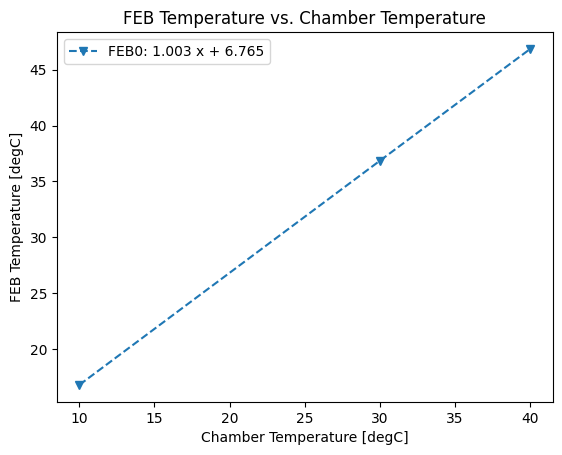

In [3]:
# FEB temp. w.r.t. chamber temp.

df1 = df.query("ch==0").reset_index()
FEBs = df1['FEB'].unique()
FEBs = np.sort(FEBs)

plt.figure()
for FEB in FEBs:
    df_ = df1.query("FEB==%i"%FEB).reset_index()
    # print(df_['tempN'], df_['FEBtemp'])
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['tempN'], df_['FEBtemp'].astype(float))
    plts = plt.plot(df_['tempN'], df_['FEBtemp'], '--v', label = 'FEB%i: %.3f x + %.3f'%(FEB, slope, intercept))    
plt.legend()
plt.title('FEB Temperature vs. Chamber Temperature')
plt.xlabel('Chamber Temperature [degC]')    
plt.ylabel('FEB Temperature [degC]')

In [4]:
FEBs = df['FEB'].unique()
FEBs = np.sort(FEBs)
FEBtemps = df['FEBtemp'].astype(float).unique()
FEBtemps = np.sort(FEBtemps)

bad_channels = [(0,18), (0,29), (0,37), (0,38), (0,44), (0,58)]

def plotter(xitem, yitem, title, normalize = False, nr = 4, nc = 4):
    
    ch_array = []
    slopes = []
    
    maintitle = title.split(';')[0]
    xtitle = title.split(';')[1]
    ytitle = title.split(';')[2]
        
    for FEB in FEBs:
        fig, axs = plt.subplots(nrows=nr, ncols=nc, figsize=(5*nc, 5*nr), sharey=True)
        plt.subplots_adjust(wspace=0)
        fig.subplots_adjust(top=0.24*nr/(0.04+0.24*nr))
        plt.suptitle(maintitle)
    
        for hdmi, ax in enumerate(axs.flatten()):
            ax.set_xlabel(xtitle)
            if(hdmi%4 == 0):
                ax.set_ylabel(ytitle)
            for inhdmi_chan in range(4):
                chan = hdmi*4+inhdmi_chan
                
                df_ = df.query("FEB==%i & ch==%i"%(FEB, chan)).reset_index()
                x = df_[xitem]
                y = df_[yitem]
                
                mask1 = ~np.isnan(y)
                mask2 = (y!=0)
                mask = mask1 & mask2
                x=x[mask]
                y=y[mask]
                if normalize:
                    y = y/y[normalize]

                if y.size==0:
                    print("Bad channel: %d"%(chan))
                    continue
                if (FEB, chan) in bad_channels:
                    continue

                slope, intercept, r_value, p_value, std_err = stats.linregress(x.astype(float), y.astype(float))
                ch_array.append(96*FEB+chan)
                if normalize:
                    slopes.append(slope*100.)
                else:
                    slopes.append(slope)
                
                '''
                ratio = - intercept / slope
                
                ratio_stderr = ratio * np.sqrt((std_err / slope)**2)
                spe_3V_over = slope*(ratio + 3)+intercept

                new_row = {'chan': chan, 'slope': slope, 'temp': temp, 'intercept': intercept,
                           'r_value': r_value, 'p_value': p_value, 'std_err': ratio_stderr, 'Vbd': ratio, 
                           'spe_3V_over': spe_3V_over, 'spe_54V_fix': slope*54+intercept,
                           'spe_55V_fix': slope*55+intercept, 'spe_60V_fix': slope*60+intercept, 'spe_65V_fix': slope*65+intercept}
                df.loc[len(df)] = new_row
                '''

                markers = ax.plot(x, y, 'o', label='Chan: %d, %s = %.3f + %.3f * x'%(chan, yitem, intercept, slope))
                ax.plot(x, slope * x + intercept, '--', color = markers[0].get_color(), linewidth=0.7)
                ax.legend(fontsize='small');
    
    return ch_array, slopes
    

In [5]:
# SPE (both) w.r.t. FEB Temp
# histogram
# by channel

Bad channel: 50


Text(0, 0.5, 'slope [raw SPE/C]')

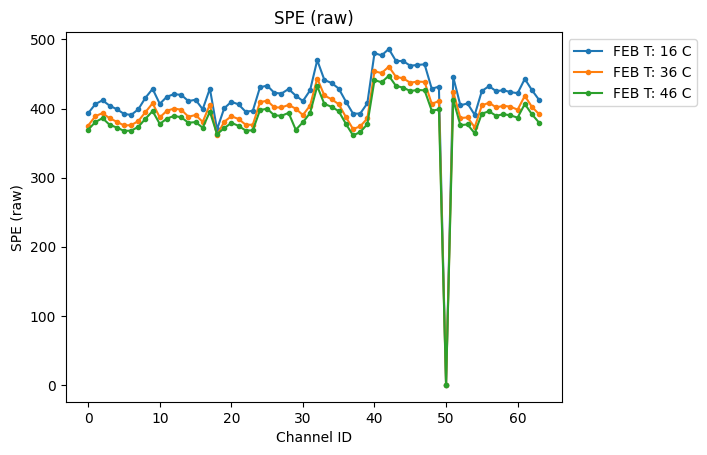

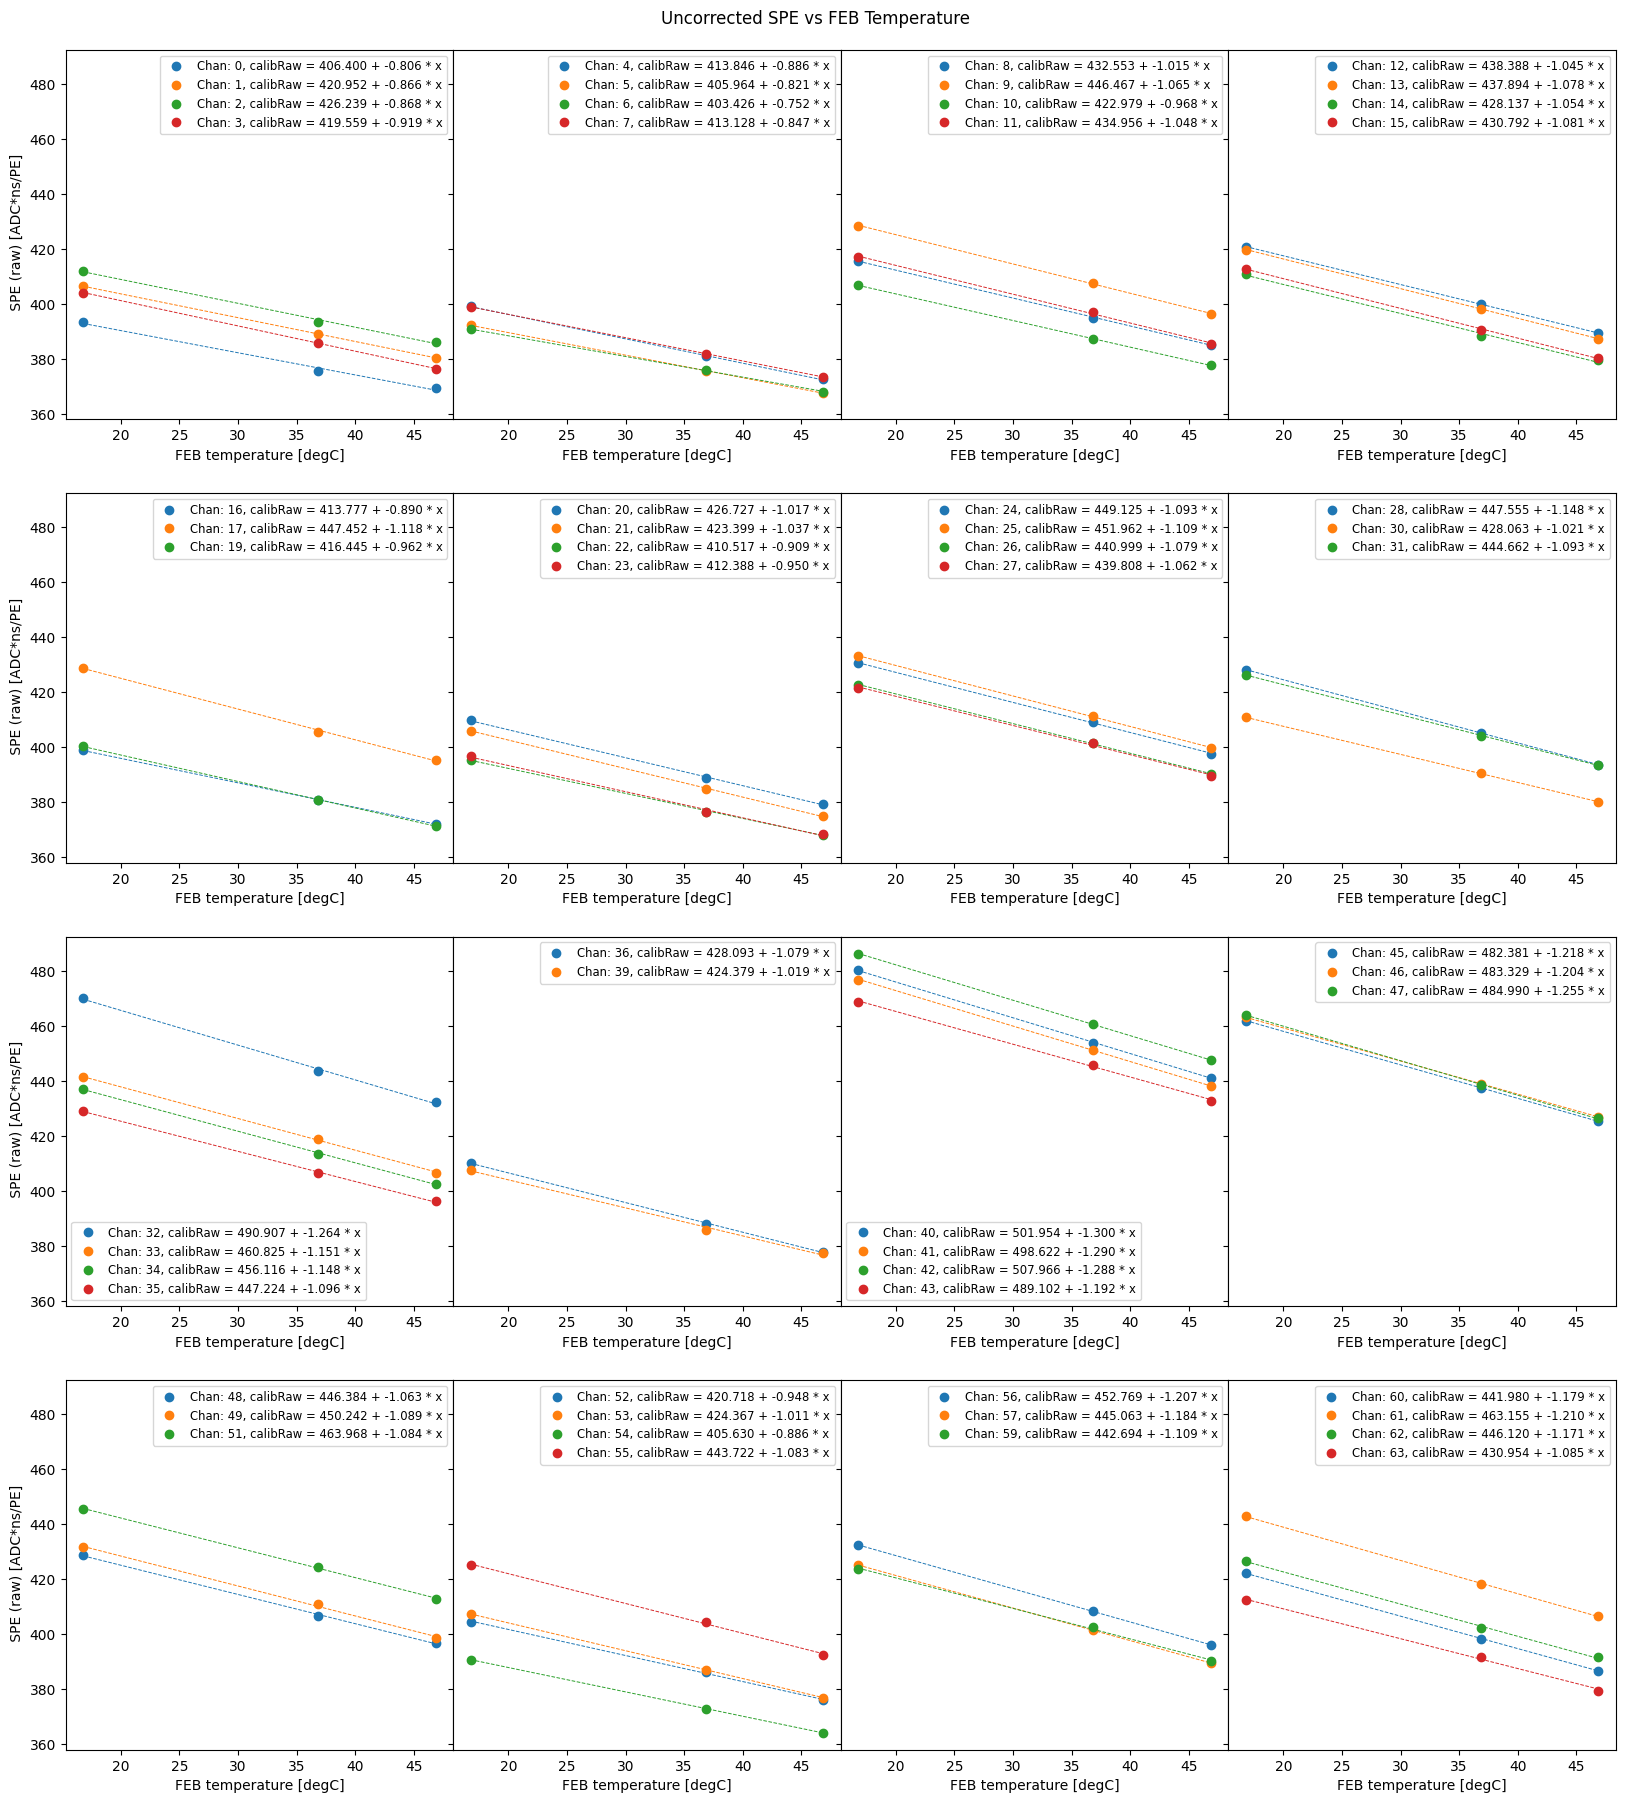

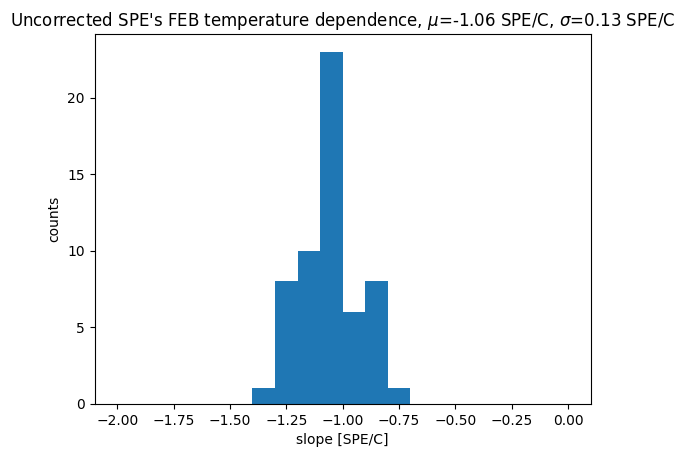

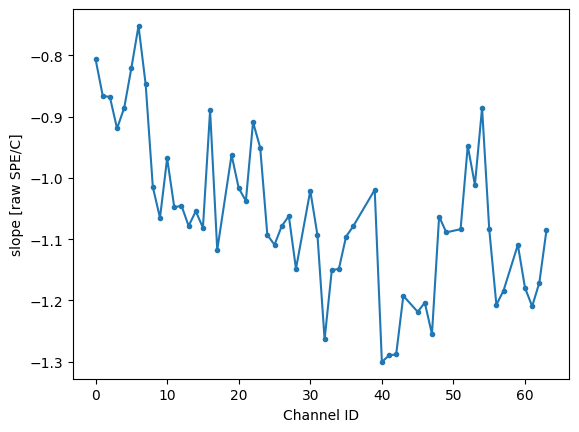

In [6]:
plt.figure()
for iFEBtemp in FEBtemps:
    df_ = df[np.isclose(df['FEBtemp'].astype(float), iFEBtemp)]
    plt.plot(df_['ch'], df_['calibRaw'], '.-', label=('FEB T: %d C'%iFEBtemp))
plt.title('SPE (raw)')
plt.xlabel("Channel ID")
plt.ylabel("SPE (raw)")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

ch_array, SPE_per_FEBtemp = plotter('FEBtemp', 'calibRaw', 'Uncorrected SPE vs FEB Temperature;FEB temperature [degC]; SPE (raw) [ADC*ns/PE]')

plt.figure()
plt.hist(SPE_per_FEBtemp, [-2.+0.1*i for i in range(20+1)])
plt.title("Uncorrected SPE's FEB temperature dependence, "+r'$\mu$'+"=%.2f SPE/C"%(np.mean(SPE_per_FEBtemp))+r', $\sigma$'+"=%.2f SPE/C"%(np.std(SPE_per_FEBtemp)))
plt.xlabel("slope [SPE/C]")
plt.ylabel("counts")   

plt.figure()
plt.plot(ch_array, SPE_per_FEBtemp, '.-')
plt.xlabel("Channel ID")
plt.ylabel("slope [raw SPE/C]")

Bad channel: 50


Text(0, 0.5, 'slope [corrected SPE/C]')

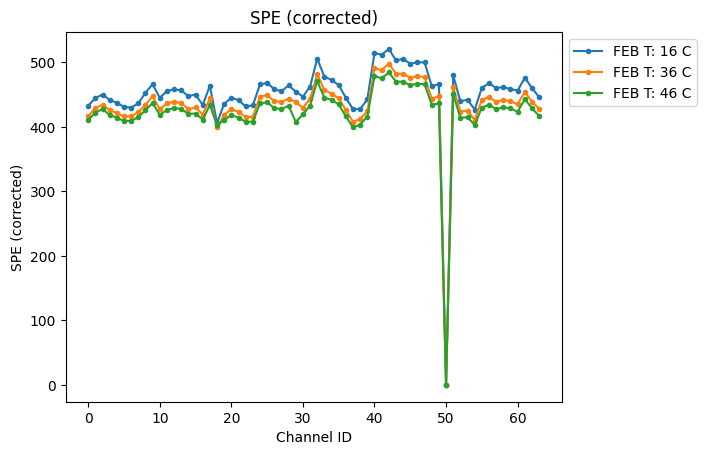

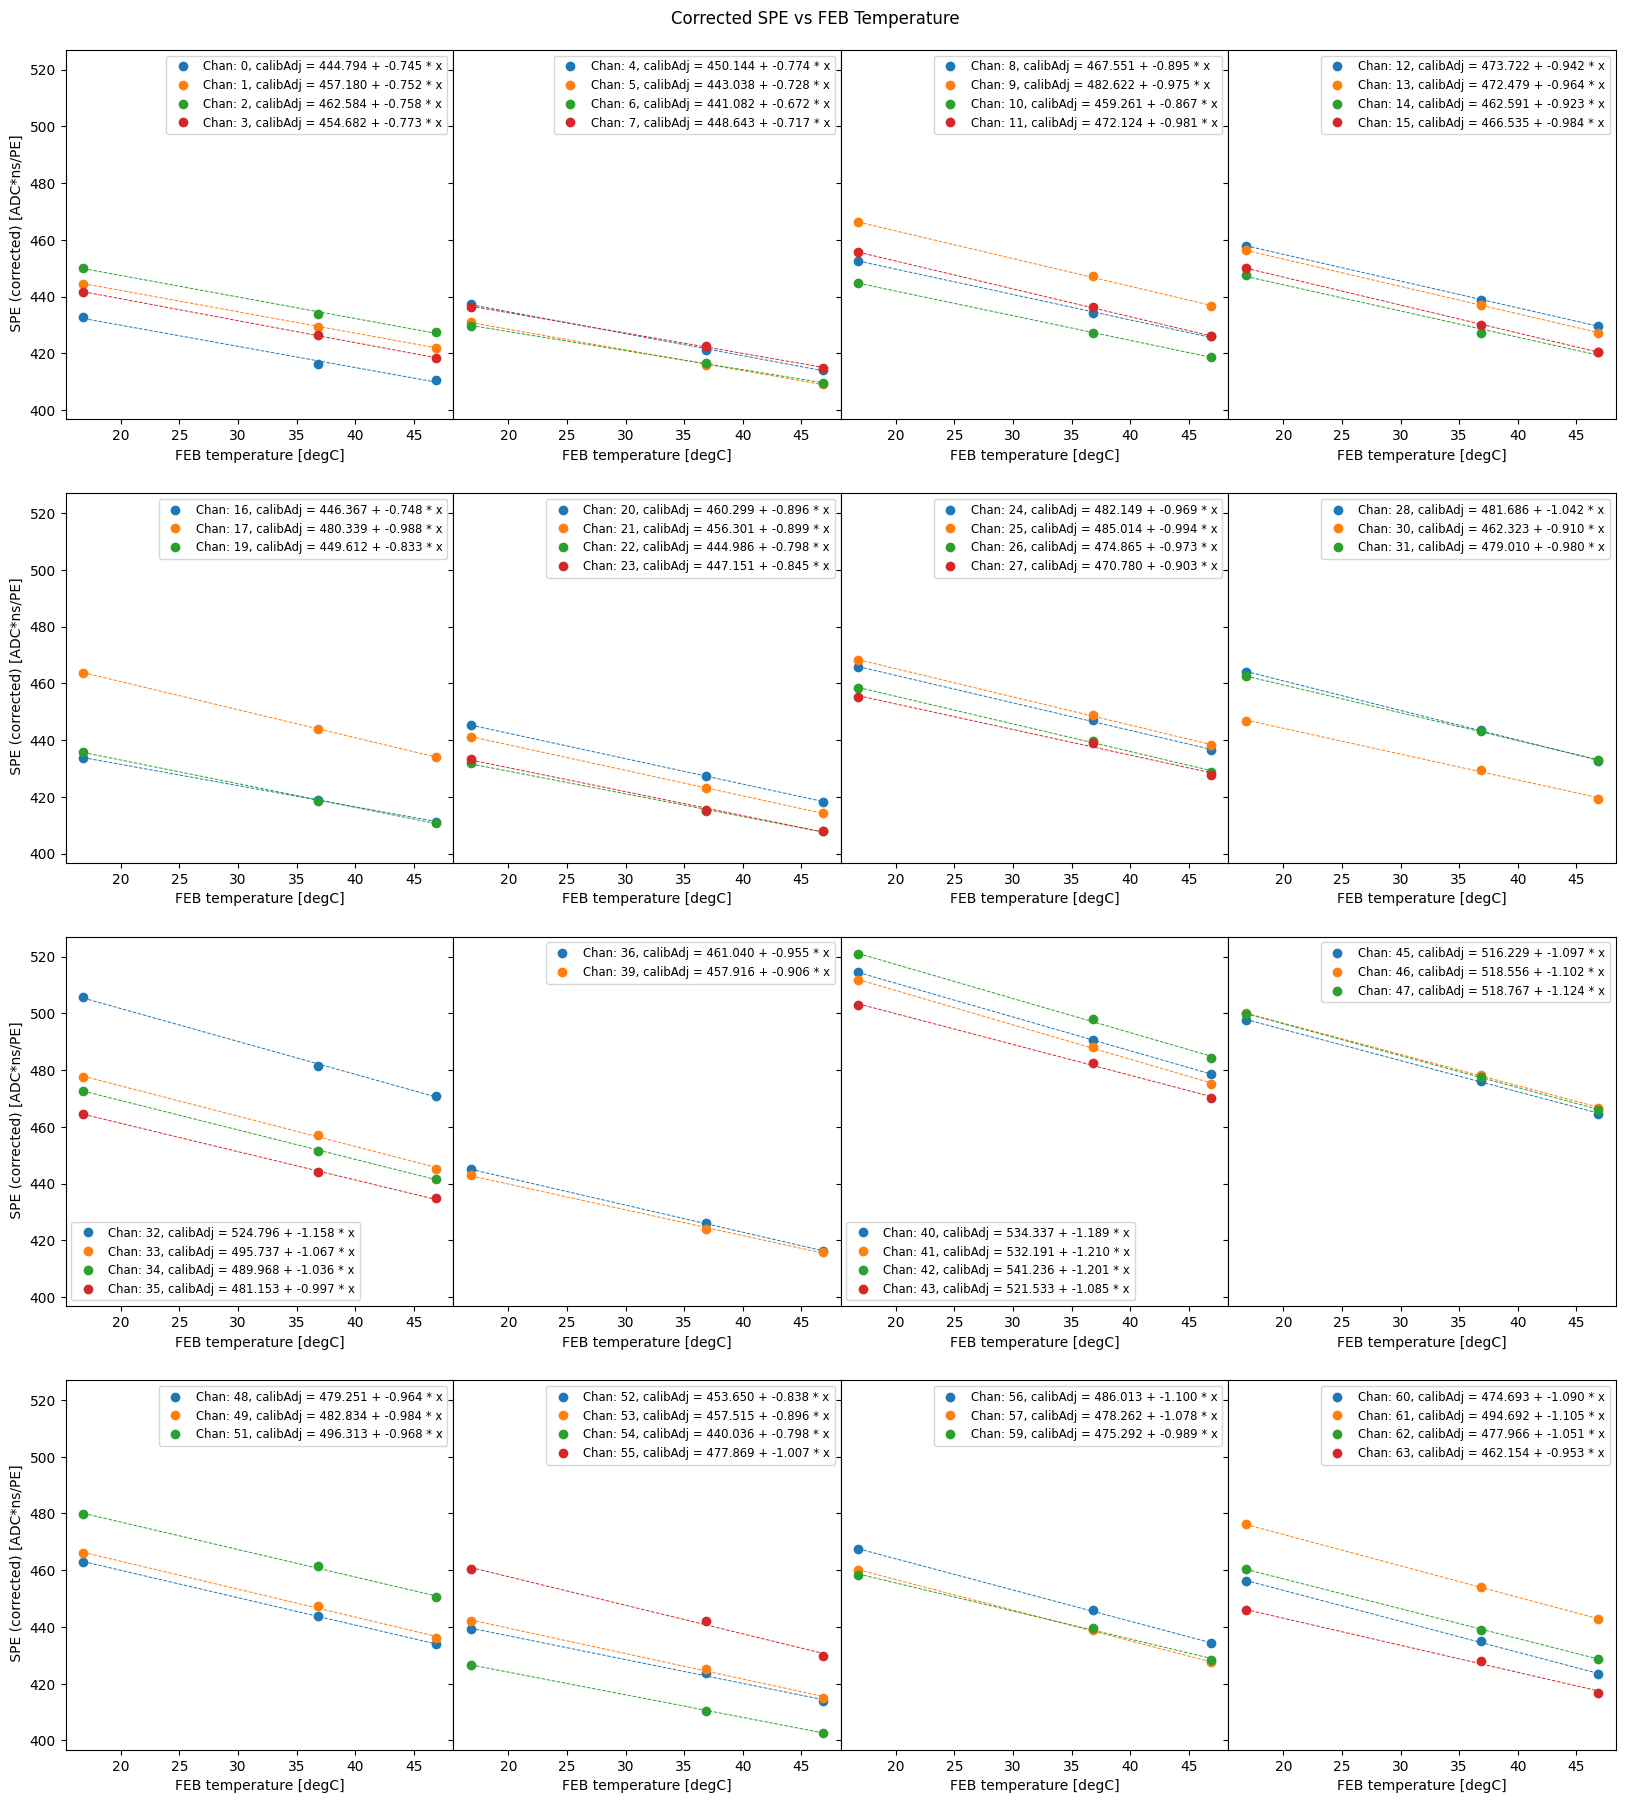

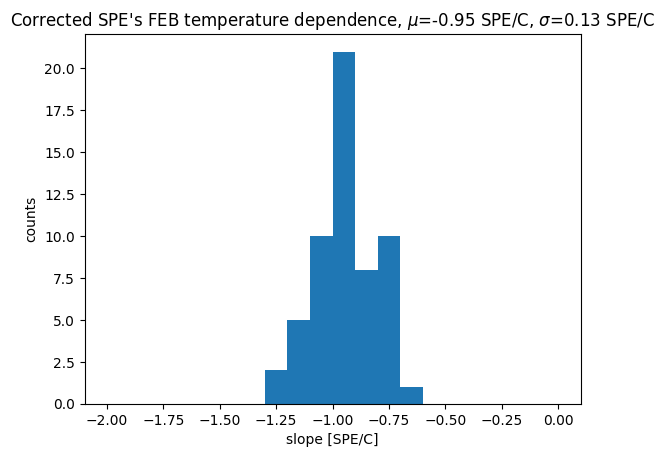

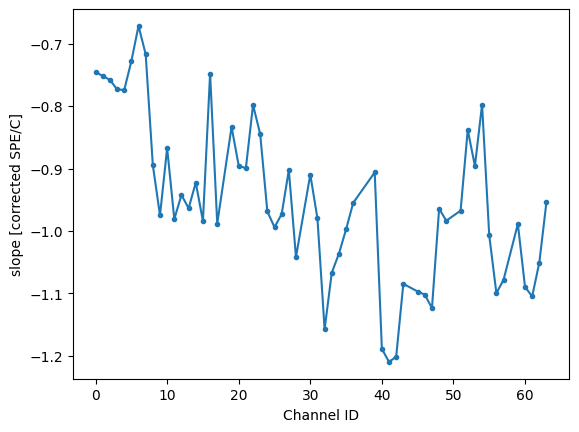

In [7]:
plt.figure()
for iFEBtemp in FEBtemps:
    df_ = df[np.isclose(df['FEBtemp'].astype(float), iFEBtemp)]
    plt.plot(df_['ch'], df_['calibAdj'], '.-', label=('FEB T: %d C'%iFEBtemp))
plt.title('SPE (corrected)')
plt.xlabel("Channel ID")
plt.ylabel("SPE (corrected)")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

ch_array, SPEcorr_per_FEBtemp = plotter('FEBtemp', 'calibAdj', 'Corrected SPE vs FEB Temperature;FEB temperature [degC]; SPE (corrected) [ADC*ns/PE]')

plt.figure()
plt.hist(SPEcorr_per_FEBtemp, [-2.+0.1*i for i in range(20+1)])
plt.title("Corrected SPE's FEB temperature dependence, "+r'$\mu$'+"=%.2f SPE/C"%(np.mean(SPEcorr_per_FEBtemp))+r', $\sigma$'+"=%.2f SPE/C"%(np.std(SPEcorr_per_FEBtemp)))
plt.xlabel("slope [SPE/C]")
plt.ylabel("counts")    

plt.figure()
plt.plot(ch_array, SPEcorr_per_FEBtemp, '.-')
plt.xlabel("Channel ID")
plt.ylabel("slope [corrected SPE/C]")

In [8]:
# lgiht yield w.r.t. FEB temp

Text(0, 0.5, 'slope [raw %/C]')

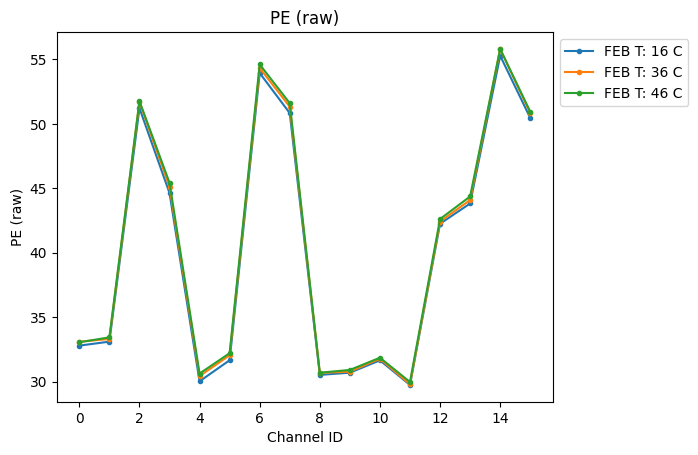

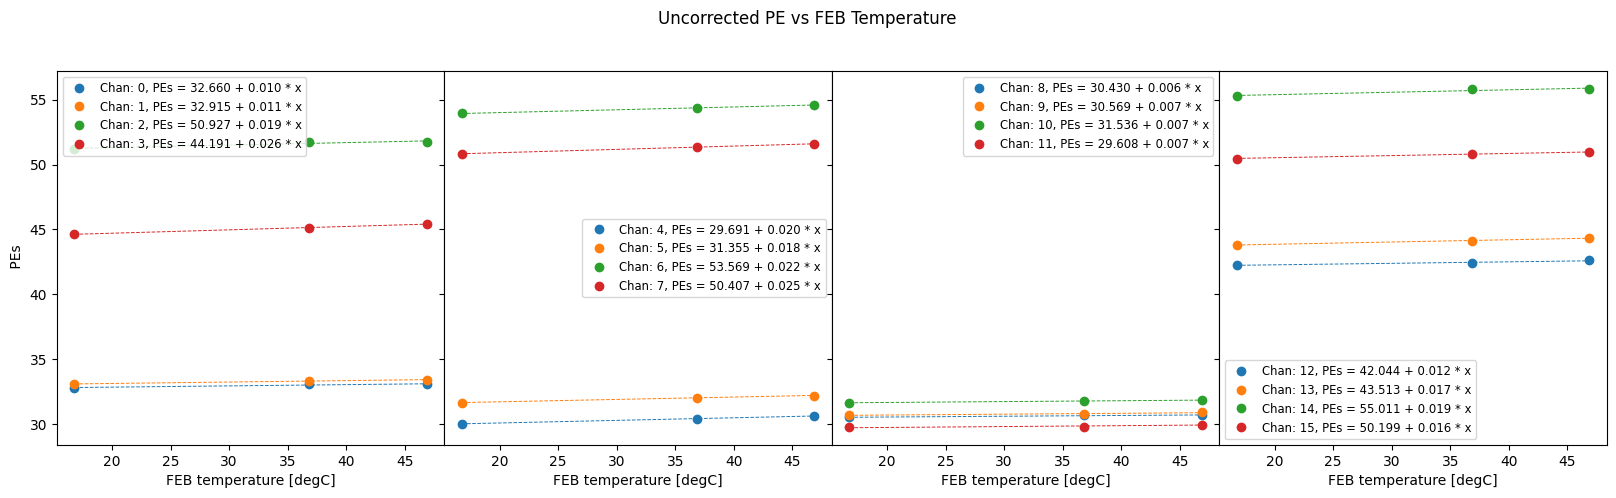

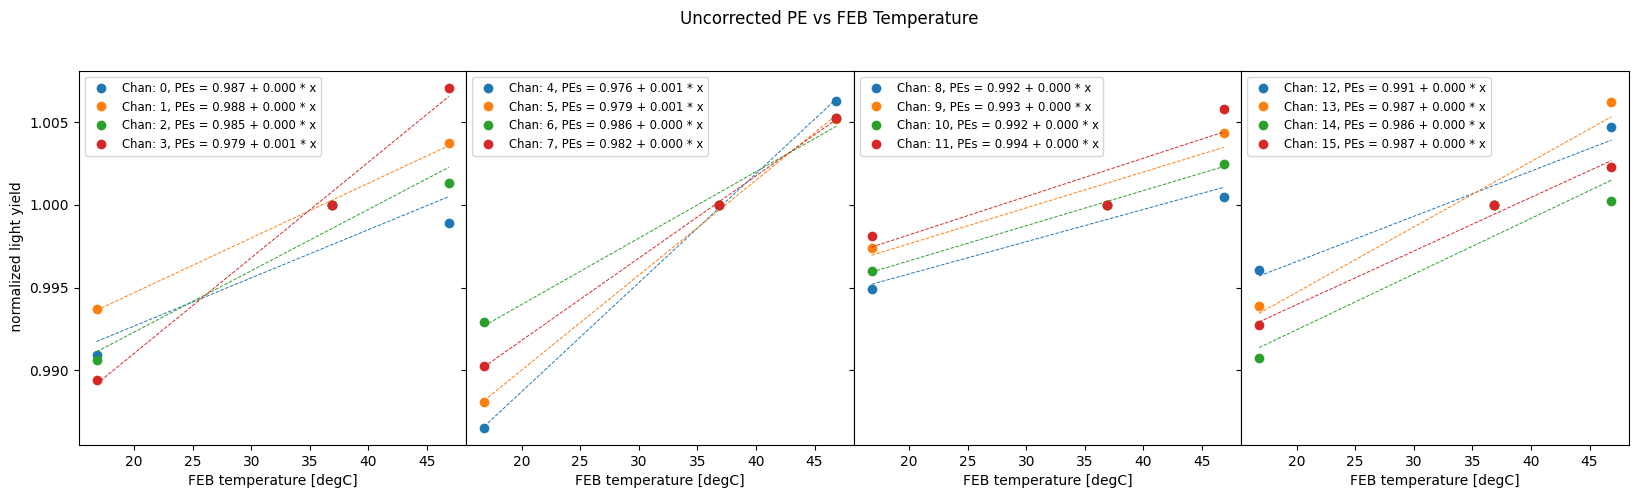

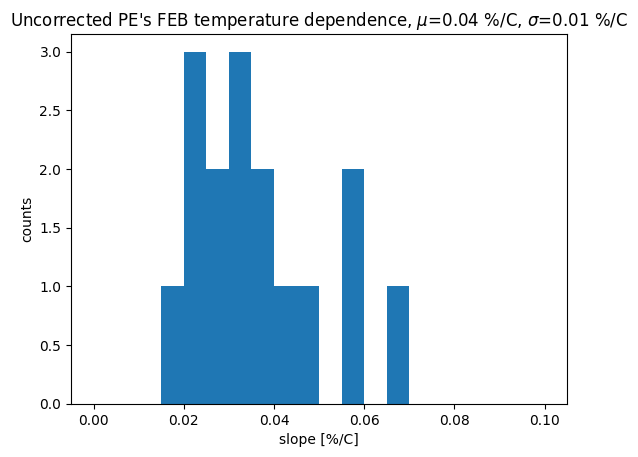

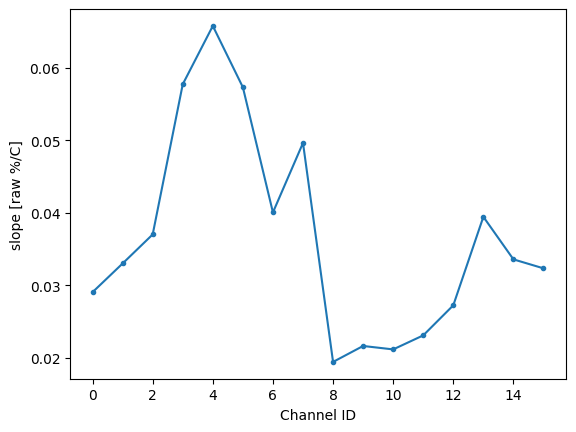

In [9]:
plt.figure()
for iFEBtemp in FEBtemps:
    df_ = df[np.isclose(df['FEBtemp'].astype(float), iFEBtemp)]
    df_ = df_.query("ch < 16").reset_index()
    plt.plot(df_['ch'], df_['PEs'], '.-', label=('FEB T: %d C'%iFEBtemp))
plt.title('PE (raw)')
plt.xlabel("Channel ID")
plt.ylabel("PE (raw)")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plotter('FEBtemp', 'PEs', 'Uncorrected PE vs FEB Temperature;FEB temperature [degC]; PEs', False, 1, 4)
ch_array, ly_per_FEBtemp = plotter('FEBtemp', 'PEs', 'Uncorrected PE vs FEB Temperature;FEB temperature [degC]; normalized light yield', 1, 1, 4)

plt.figure()
plt.hist(ly_per_FEBtemp, [0.005*i for i in range(20+1)])
plt.title("Uncorrected PE's FEB temperature dependence, "+r'$\mu$'+"=%.2f %%/C"%(np.mean(ly_per_FEBtemp))+r', $\sigma$'+"=%.2f %%/C"%(np.std(ly_per_FEBtemp)))
plt.xlabel("slope [%/C]")
plt.ylabel("counts")   

plt.figure()
plt.plot(ch_array, ly_per_FEBtemp, '.-')
plt.xlabel("Channel ID")
plt.ylabel("slope [raw %/C]")

Text(0, 0.5, 'slope [corrected %/C]')

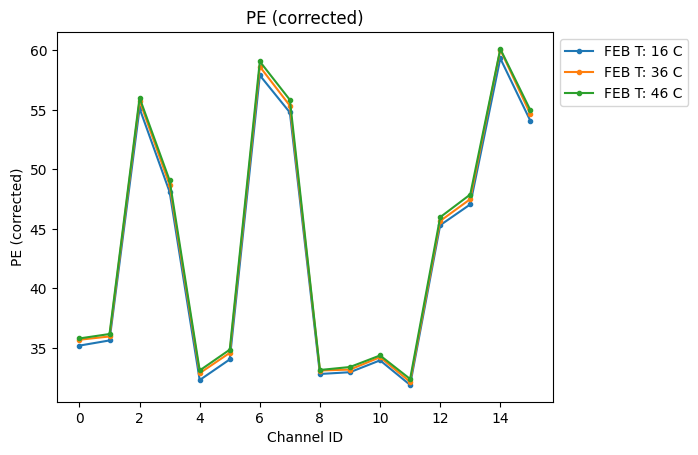

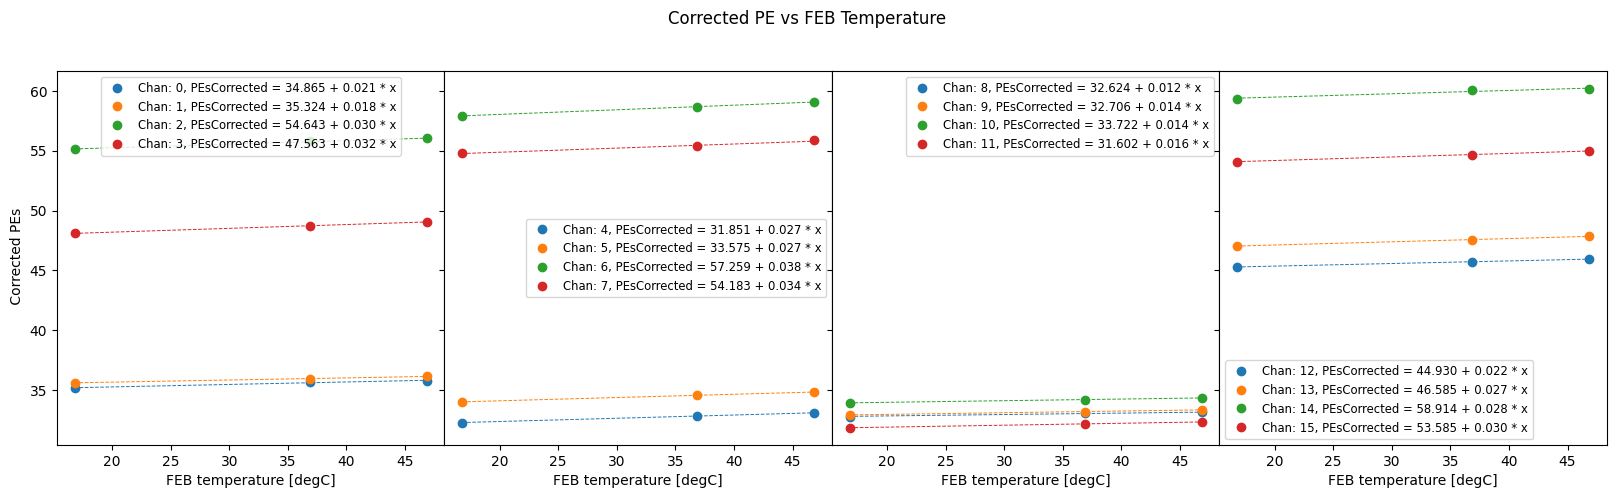

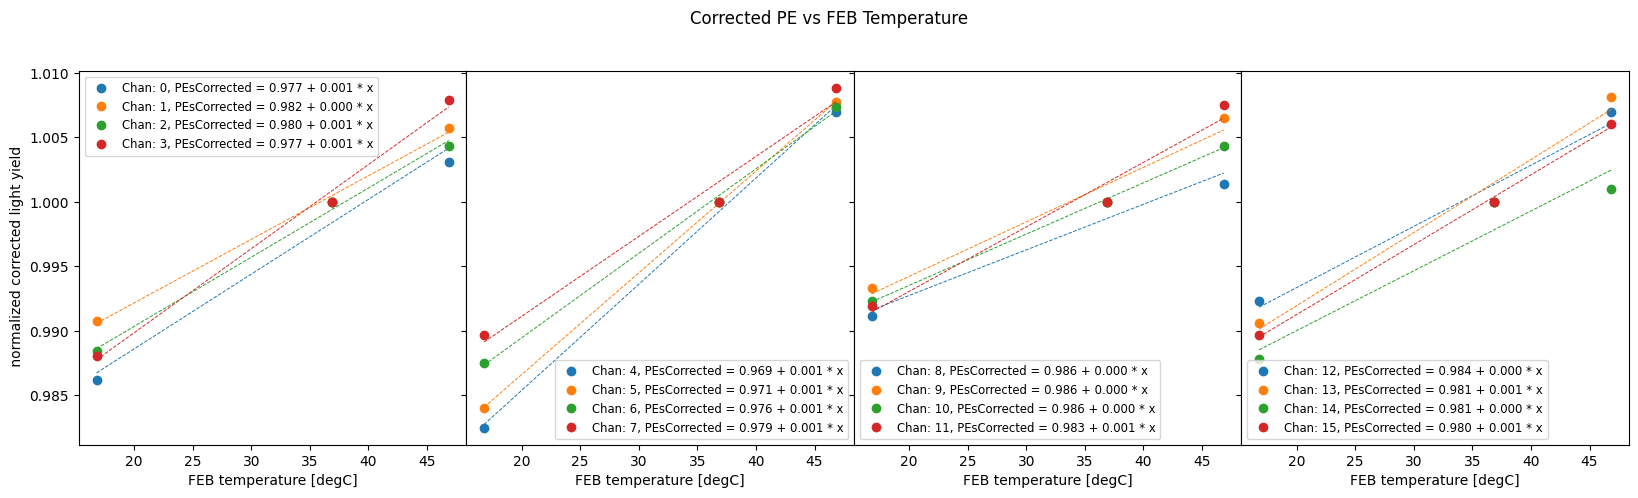

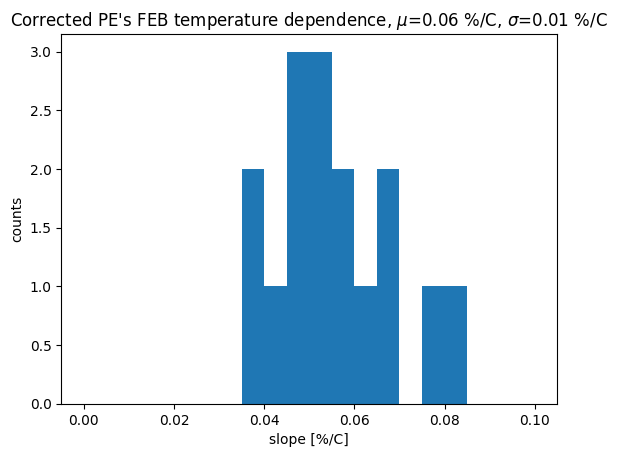

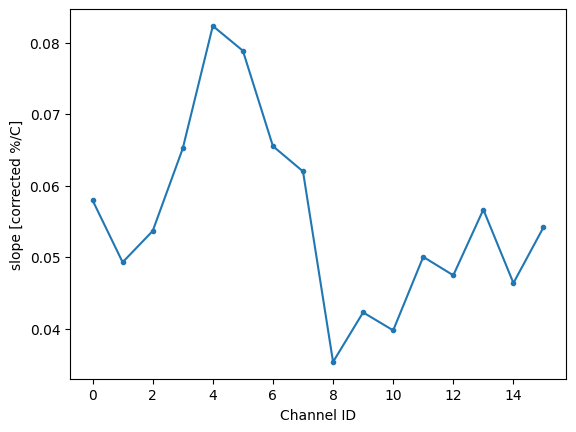

In [10]:
plt.figure()
for iFEBtemp in FEBtemps:
    df_ = df[np.isclose(df['FEBtemp'].astype(float), iFEBtemp)]
    df_ = df_.query("ch < 16").reset_index()
    plt.plot(df_['ch'], df_['PEsCorrected'], '.-', label=('FEB T: %d C'%iFEBtemp))
plt.title('PE (corrected)')
plt.xlabel("Channel ID")
plt.ylabel("PE (corrected)")
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plotter('FEBtemp', 'PEsCorrected', 'Corrected PE vs FEB Temperature;FEB temperature [degC]; Corrected PEs', False, 1, 4)
ch_array, lycorr_per_FEBtemp = plotter('FEBtemp', 'PEsCorrected', 'Corrected PE vs FEB Temperature;FEB temperature [degC]; normalized corrected light yield', 1, 1, 4)

plt.figure()
plt.hist(lycorr_per_FEBtemp, [0.005*i for i in range(20+1)])
plt.title("Corrected PE's FEB temperature dependence, "+r'$\mu$'+"=%.2f %%/C"%(np.mean(lycorr_per_FEBtemp))+r', $\sigma$'+"=%.2f %%/C"%(np.std(lycorr_per_FEBtemp)))
plt.xlabel("slope [%/C]")
plt.ylabel("counts")   

plt.figure()
plt.plot(ch_array, lycorr_per_FEBtemp, '.-')
plt.xlabel("Channel ID")
plt.ylabel("slope [corrected %/C]")